In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import f1_score

# Load the dataset
data_path = r"C:\Users\sam\Downloads\appliances+energy+prediction\energydata_complete.csv"  
# Replace with the actual path to the dataset file
df = pd.read_csv(data_path)

# Extract useful features from the datetime column
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

# Drop the original datetime column
df.drop('date', axis=1, inplace=True)

# Display the first few rows of the dataset
print(df.head())

# Check the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Get information about the data types
print(df.info())

# Summarize the statistics of the variables
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Appliances  lights     T1       RH_1    T2       RH_2     T3       RH_3  \
0          60      30  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1          60      30  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2          50      30  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3          50      40  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4          60      40  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4  ...     T_out  Press_mm_hg  RH_out  Windspeed  \
0  19.000000  45.566667  ...  6.600000        733.5    92.0   7.000000   
1  19.000000  45.992500  ...  6.483333        733.6    92.0   6.666667   
2  18.926667  45.890000  ...  6.366667        733.7    92.0   6.333333   
3  18.890000  45.723333  ...  6.250000        733.8    92.0   6.000000   
4  18.890000  45.530000  ...  6.133333        733.9    92.0   5.666667   

   Visibility  Tdewpoint        rv1        rv2  hour  day_of_week  
0   63.000000     

# to find the imbalanced data

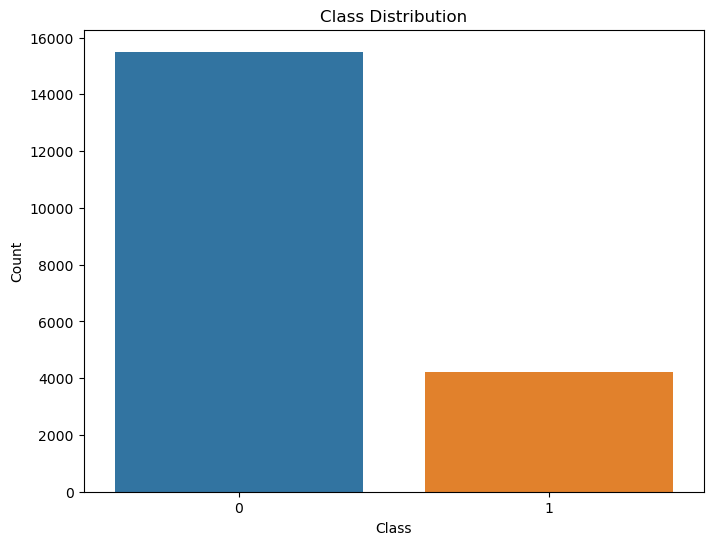

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = df['AppliancesBinary'].value_counts()

# Calculate class proportions
class_proportions = class_distribution / len(df)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='AppliancesBinary', data=df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()



In [10]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


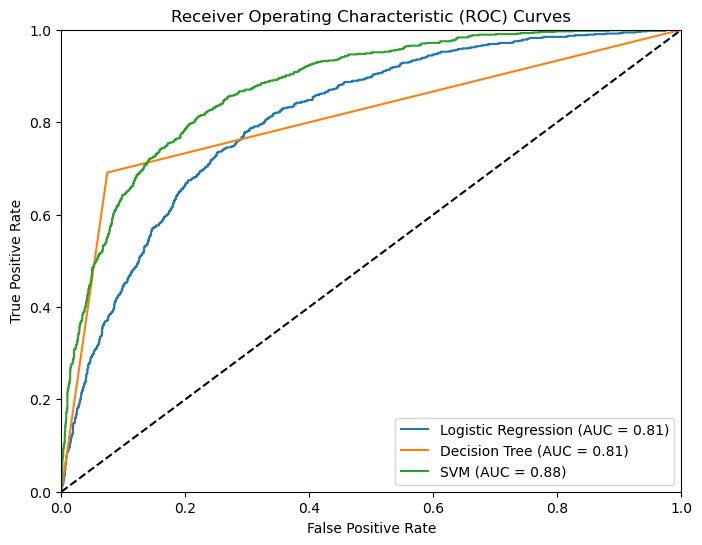

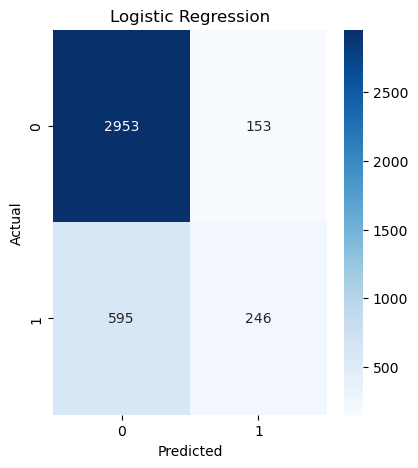

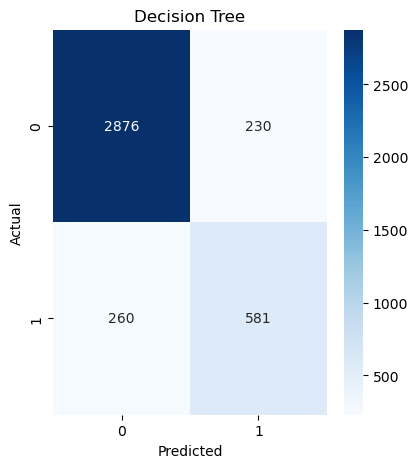

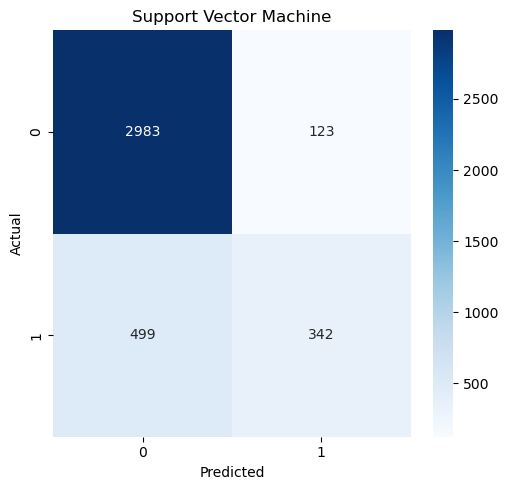

Evaluation Metrics:
Logistic Regression - Accuracy: 0.81, Precision: 0.62, Recall: 0.29, F1 Score: 0.40
Decision Tree - Accuracy: 0.88, Precision: 0.72, Recall: 0.69, F1 Score: 0.70
SVM - Accuracy: 0.84, Precision: 0.74, Recall: 0.41, F1 Score: 0.52


In [12]:



# Prepare the data for binary classification
df['AppliancesBinary'] = df['Appliances'].apply(lambda x: 1 if x > 100 else 0)  # Set threshold for binary classification

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Appliances', 'AppliancesBinary'], axis=1)
y = df['AppliancesBinary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling to balance the data
oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling Section
# Train and evaluate Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Calculate probabilities for ROC curve
y_pred_proba_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC score
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)

# Train and evaluate Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)


# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test_scaled)

# Calculate probabilities for ROC curve
y_pred_proba_tree = tree_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC score
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_proba_tree)
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

# Train and evaluate Support Vector Machine (SVM) model
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate probabilities for ROC curve
y_pred_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC score
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


# Logistic Regression confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
logreg_cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
tree_cm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(tree_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Support Vector Machine confusion matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
svm_cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_cm, annot=True, cmap='Blues', fmt='d')
plt.title('Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Calculate Accuracy
accuracy_logreg = (y_test == y_pred_logreg).mean()
accuracy_tree = (y_test == y_pred_tree).mean()
accuracy_svm = (y_test == y_pred_svm).mean()

# Calculate Precision
precision_logreg = logreg_cm[1, 1] / (logreg_cm[1, 1] + logreg_cm[0, 1])
precision_tree = tree_cm[1, 1] / (tree_cm[1, 1] + tree_cm[0, 1])
precision_svm = svm_cm[1, 1] / (svm_cm[1, 1] + svm_cm[0, 1])

# Calculate Recall
recall_logreg = logreg_cm[1, 1] / (logreg_cm[1, 1] + logreg_cm[1, 0])
recall_tree = tree_cm[1, 1] / (tree_cm[1, 1] + tree_cm[1, 0])
recall_svm = svm_cm[1, 1] / (svm_cm[1, 1] + svm_cm[1, 0])

# Calculate F1 Score
f1_logreg = 2 * (precision_logreg * recall_logreg) / (precision_logreg + recall_logreg)
f1_tree = 2 * (precision_tree * recall_tree) / (precision_tree + recall_tree)
f1_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)

# Print the evaluation metrics
print("Evaluation Metrics:")
print(f"Logistic Regression - Accuracy: {accuracy_logreg:.2f}, Precision: {precision_logreg:.2f}, Recall: {recall_logreg:.2f}, F1 Score: {f1_logreg:.2f}")
print(f"Decision Tree - Accuracy: {accuracy_tree:.2f}, Precision: {precision_tree:.2f}, Recall: {recall_tree:.2f}, F1 Score: {f1_tree:.2f}")
print(f"SVM - Accuracy: {accuracy_svm:.2f}, Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}, F1 Score: {f1_svm:.2f}")

